# Titanic Dataset

In [17]:
# Import Packages, Tools, & Libraries
import os, sys
sys.path.append(os.path.abspath('..'))
from tools.analysis import single_variable_EDA, pairwise_EDA, correlation_analysis, statistical_tests, chord_diagram
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [9]:
import seaborn as sns

# Load the Titanic dataset
titanic_data = sns.load_dataset('titanic')

In [10]:
titanic_data

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


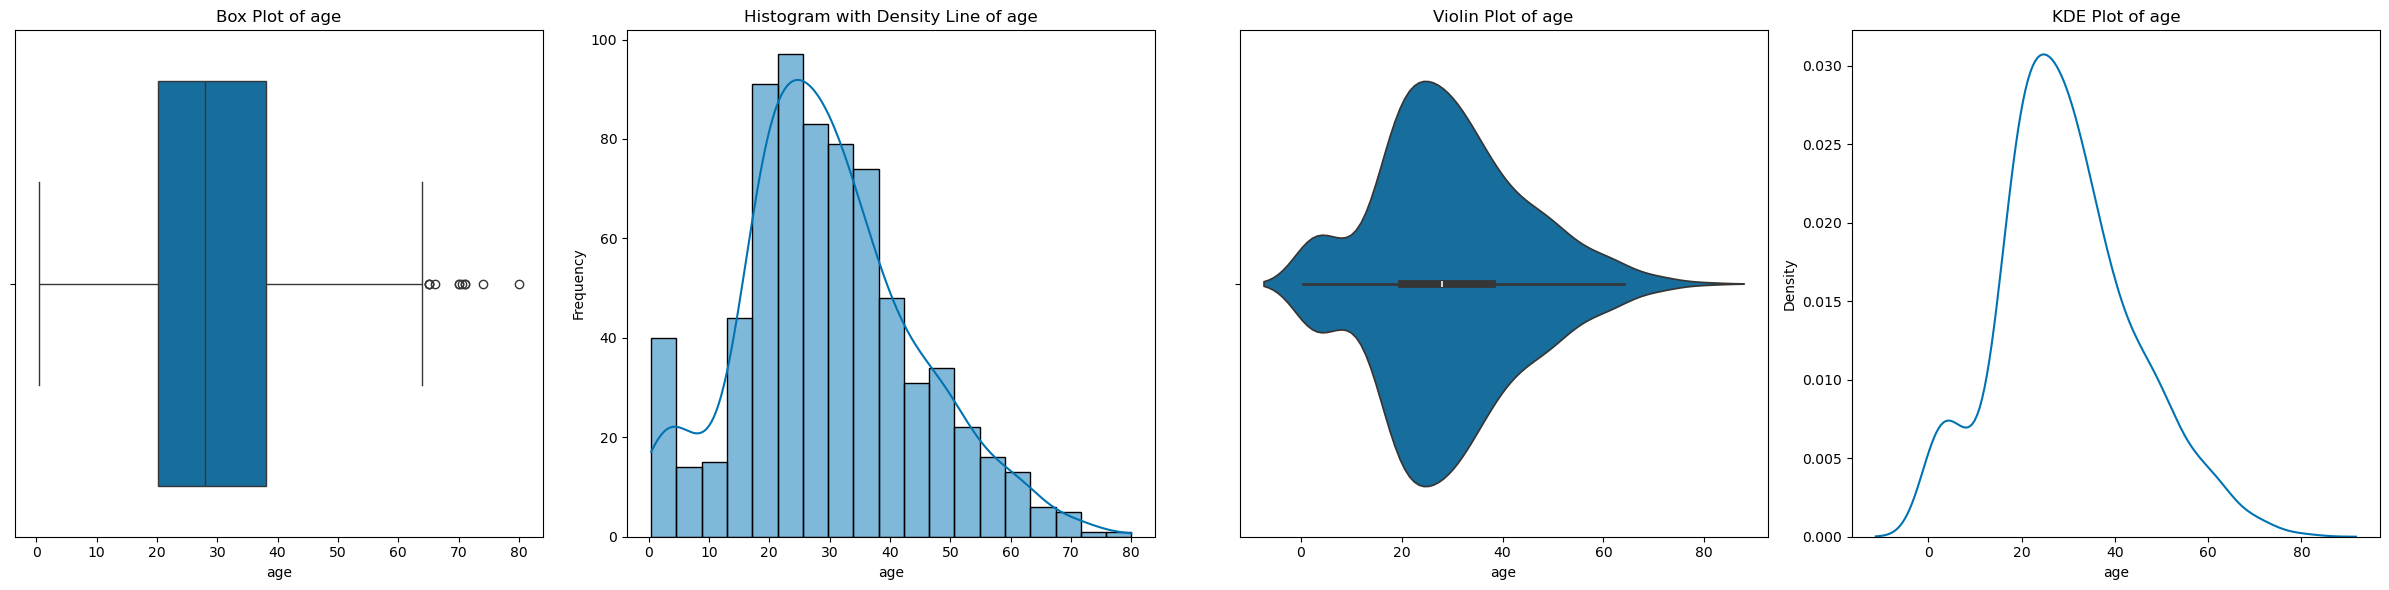

Aggregate Statistics of age:


count,mean,std,min,25%,50%,75%,max,missing
714.0,29.699118,14.526497,0.42,20.125,28.0,38.0,80.0,177


Outlier examples (using IQR method) of age:


survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,2,male,66.0,0,0,10.5000,S,Second,man,True,NaN,Southampton,no,True
0,1,male,65.0,0,1,61.9792,C,First,man,True,B,Cherbourg,no,False
0,1,male,71.0,0,0,34.6542,C,First,man,True,A,Cherbourg,no,True
0,3,male,70.5,0,0,7.7500,Q,Third,man,True,NaN,Queenstown,no,True
0,3,male,65.0,0,0,7.7500,Q,Third,man,True,NaN,Queenstown,no,True
0,1,male,65.0,0,0,26.5500,S,First,man,True,E,Southampton,no,True
0,1,male,71.0,0,0,49.5042,C,First,man,True,NaN,Cherbourg,no,True
1,1,male,80.0,0,0,30.0000,S,First,man,True,A,Southampton,yes,True
0,2,male,70.0,0,0,10.5000,S,Second,man,True,NaN,Southampton,no,True
0,1,male,70.0,1,1,71.0000,S,First,man,True,B,Southampton,no,False


Note: only up to the first 25 outliers are displayed.
Total number of potential outliers: 11
Lower Bound (Q1 - 1.5*IQR): -6.6875 / Upper Bound (Q3 + 1.5*IQR): 64.8125


In [12]:
single_variable_EDA(titanic_data, 'age')

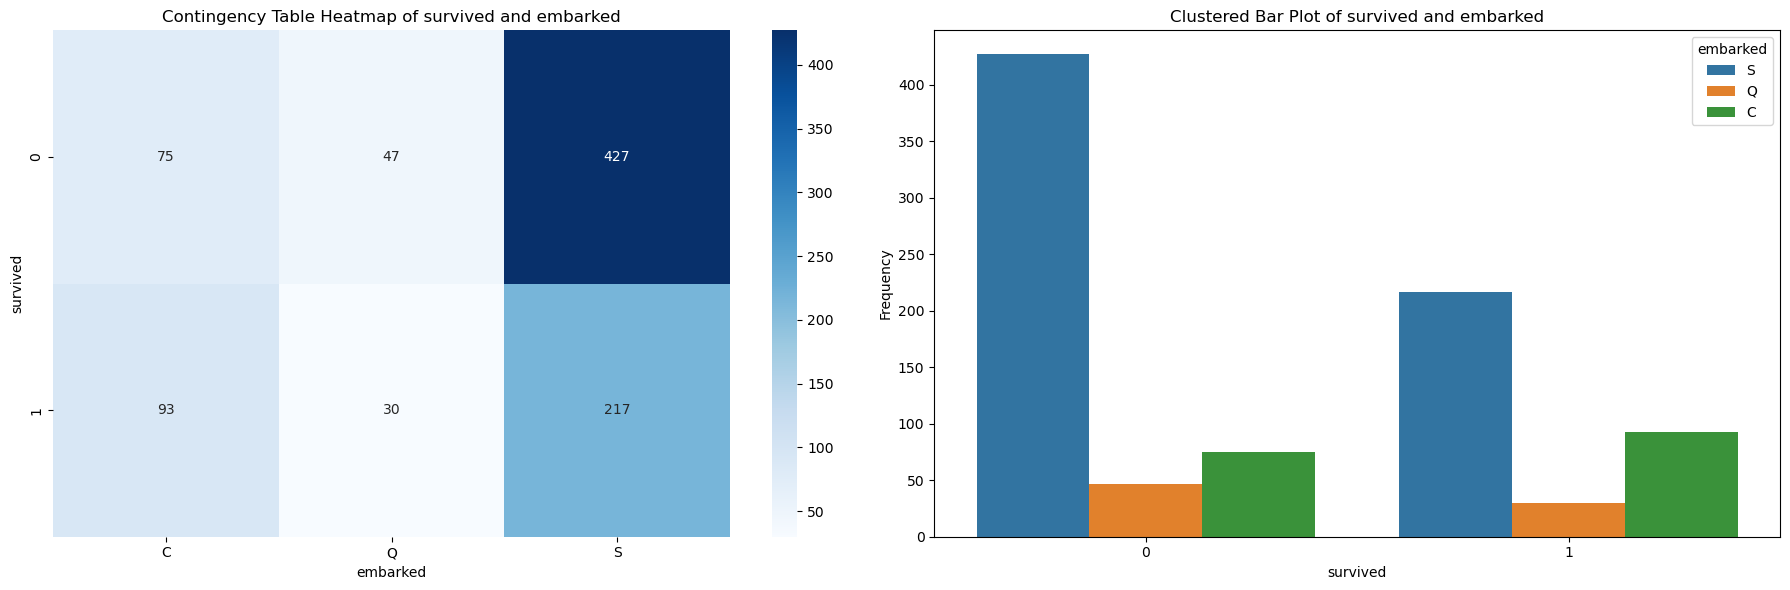

Correlation Measure,Correlation Value,Description,Explanation
Cramér's V,0.172423,Very weak or no positive correlation,Measures association between two categorical variables.


In [13]:
pairwise_EDA(titanic_data, 'survived', 'embarked')

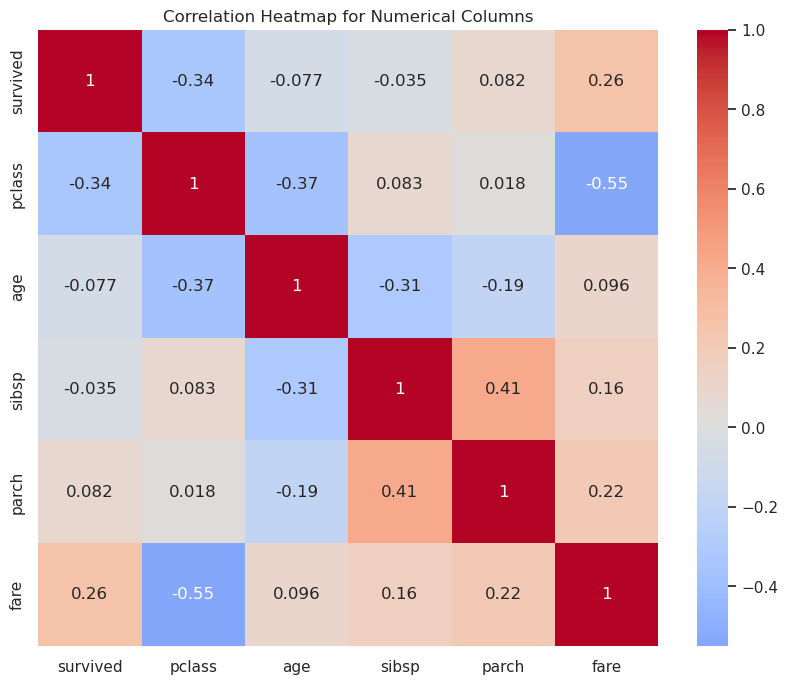

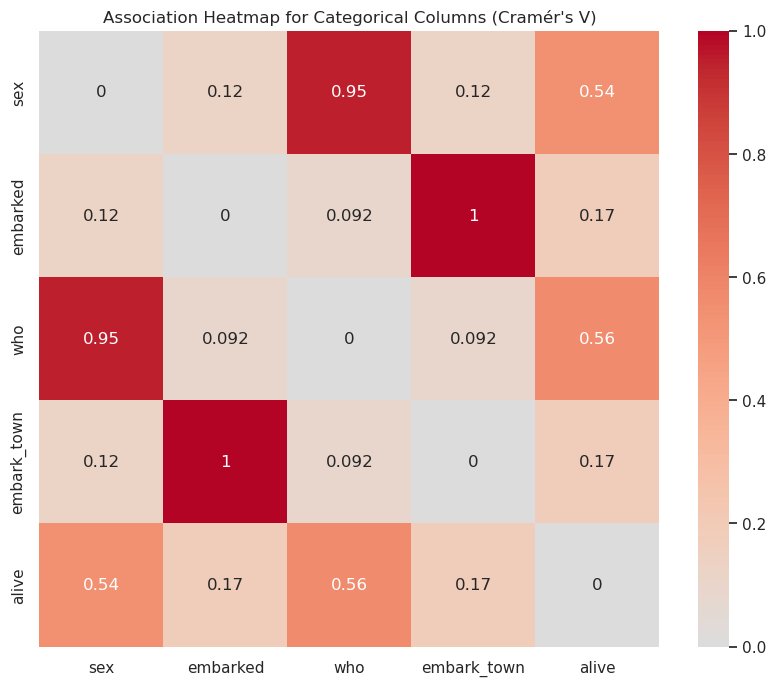

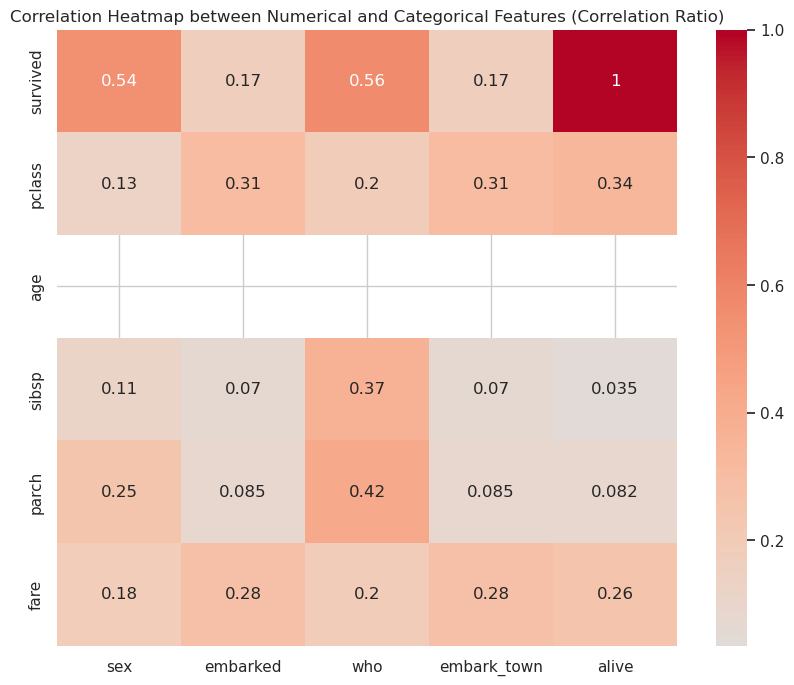

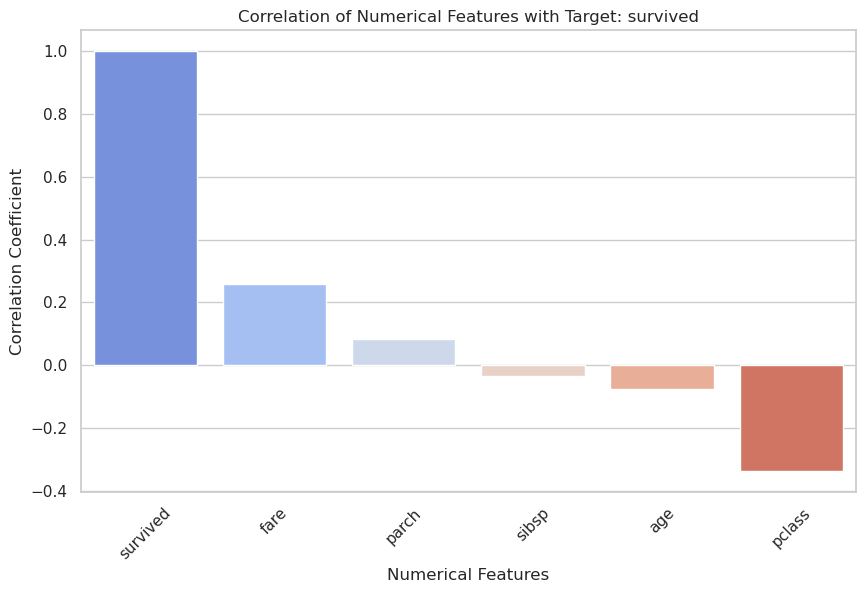

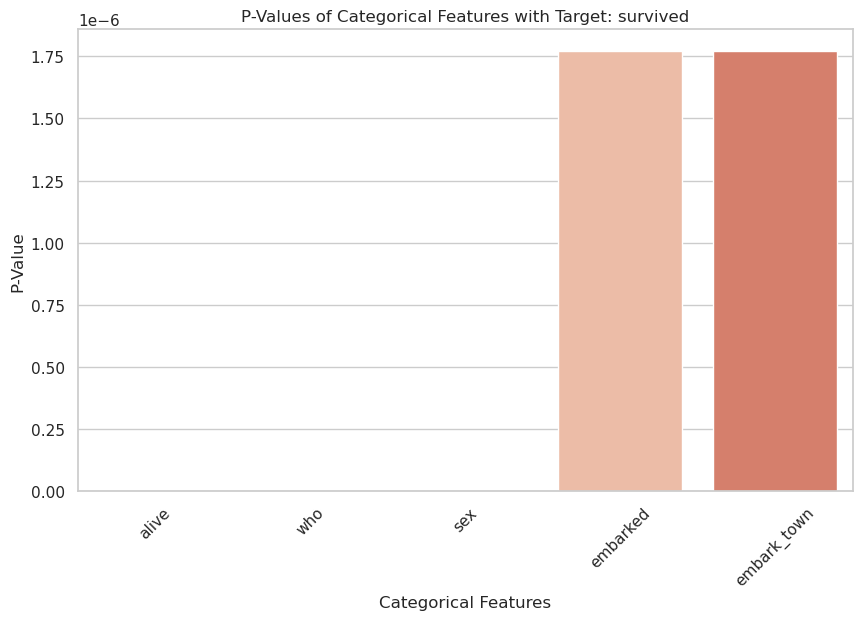

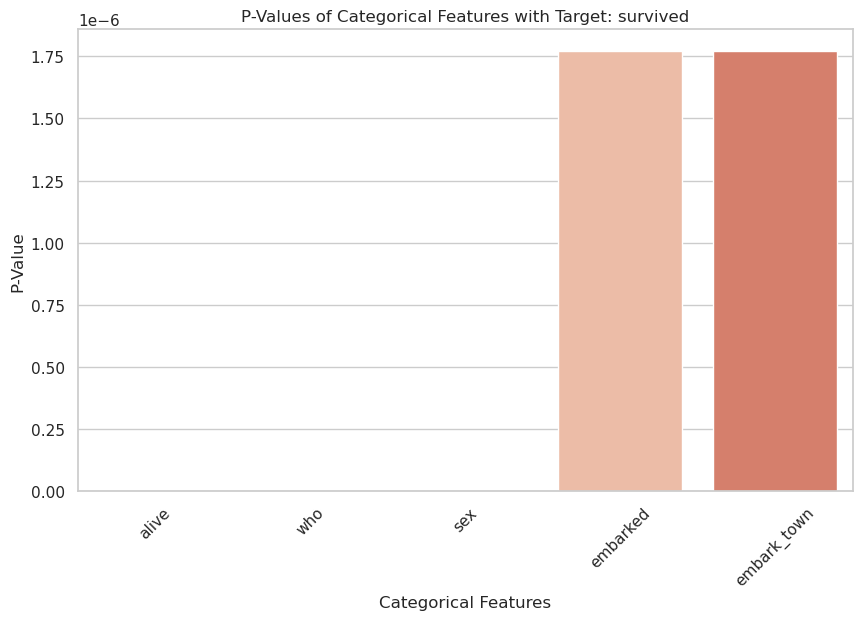

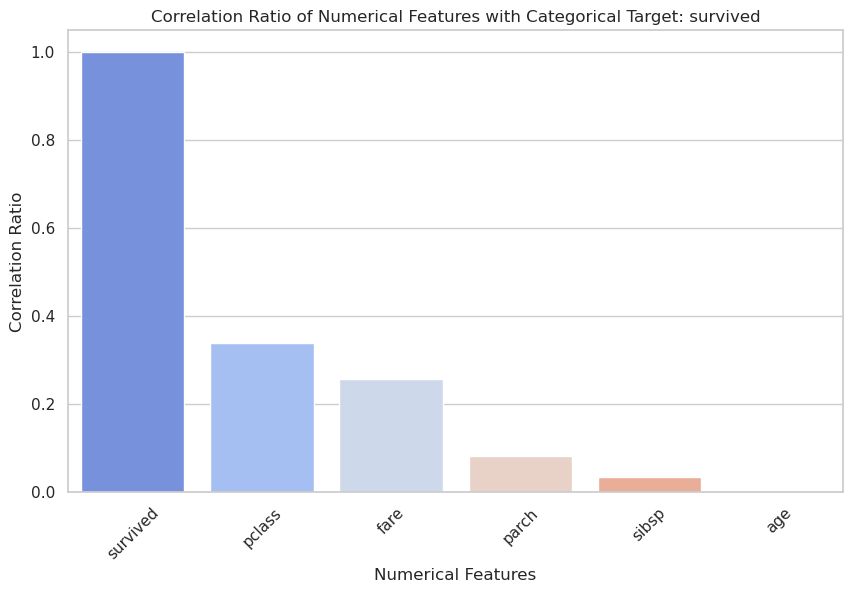

In [16]:
correlation_analysis(titanic_data, 'survived')

In [21]:
titanic_data

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


In [24]:
# create a logistic regression model
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# split data
X = titanic_data[['pclass', 'fare']] # NOTE: GUYS THIS IS BAD CHANGE THSI LINE LATER OK, USE MORE FEATURES, THIS IS BECAUSE IM LAZY TO TYPE OUT ALL THE FEATURES RN 
# X = titanic_data.drop('survived', axis=1)
y = titanic_data['survived']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# create a logistic regression model
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)

# evaluate
y_pred = log_reg.predict(X_test)
print('Accuracy:', accuracy_score(y_test, y_pred))
print('Precision:', precision_score(y_test, y_pred))
print('Recall:', recall_score(y_test, y_pred))
print('F1:', f1_score(y_test, y_pred))

Accuracy: 0.7039106145251397
Precision: 0.6981132075471698
Recall: 0.5
F1: 0.5826771653543307
